In [1]:
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar

import copernicusmarine
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

PATH_SSC = "../Data/Unprocessed/CMEMS-SSC-Arctic.nc"
PATH_SSH = "../Data/Unprocessed/CMEMS-SSH-Arctic.nc"
PATH_SSW = "../Data/Unprocessed/ERA5-SSW-Arctic.nc"

PATH_FULL = "../Data/Processed/Full-Arctic.nc"
PATH_PROCESSED = "../Data/Processed/Full-Processed-Arctic.nc"

/home/kiryn/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# SSC Import
copernicusmarine.subset(
  dataset_id="cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m",
  variables=["uo", "vo"],
  minimum_longitude=-180,
  maximum_longitude=179.9169921875,
  minimum_latitude=65,
  maximum_latitude=90,
  start_datetime="2024-01-01T00:00:00",
  end_datetime="2024-12-31T00:00:00",
  minimum_depth=0.49402499198913574,
  maximum_depth=0.49402499198913574,
)

INFO - 2025-03-15T14:46:25Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine password:

INFO - 2025-03-15T14:46:38Z - Selected dataset version: "202406"
INFO - 2025-03-15T14:46:38Z - Selected dataset part: "default"
INFO - 2025-03-15T14:46:43Z - Starting download. Please wait...
100%|██████████| 19824/19824 [04:21<00:00, 75.90it/s] 
INFO - 2025-03-15T14:51:08Z - Successfully downloaded to cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_180.00W-179.92E_65.00N-90.00N_0.49m_2024-01-01-2024-12-31.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_180.00W-179.92E_65.00N-90.00N_0.49m_2024-01-01-2024-12-31.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_uo-vo_180.00W-179.92E_65.00N-90.00N_0.49m_2024-01-01-2024-12-31.nc', file_size=3632.9681145038167, data_transfer_size=11396.260152671755, variables=['uo', 'vo'], coordinates_extent=[GeographicalExtent(minimum=-180.0, maximum=179.91668701171875, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=65.0, maximum=90.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2024-01-01T00:00:00+00:00', maximum='2024-12-31T00:00:00+00:00', unit='iso8601', coordinate_id='time'), GeographicalExtent(minimum=0.49402499198913574, maximum=0.49402499198913574, unit='m', coordinate_id='depth')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [ ]:
# SSH Import
copernicusmarine.subset(
  dataset_id="cmems_mod_glo_phy_anfc_0.083deg_P1D-m",
  variables=["zos"],
  minimum_longitude=-180,
  maximum_longitude=179.9169921875,
  minimum_latitude=65,
  maximum_latitude=90,
  start_datetime="2024-01-01T00:00:00",
  end_datetime="2024-12-31T00:00:00",
  minimum_depth=0.49402499198913574,
  maximum_depth=0.49402499198913574,
)

INFO - 2025-03-15T14:40:53Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine password:

INFO - 2025-03-15T14:41:15Z - Selected dataset version: "202406"
INFO - 2025-03-15T14:41:15Z - Selected dataset part: "default"
INFO - 2025-03-15T14:41:23Z - Starting download. Please wait...
100%|██████████| 19560/19560 [02:14<00:00, 144.90it/s]
INFO - 2025-03-15T14:43:41Z - Successfully downloaded to cmems_mod_glo_phy_anfc_0.083deg_P1D-m_zos_180.00W-179.92E_65.00N-90.00N_2024-01-01-2024-12-31.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_phy_anfc_0.083deg_P1D-m_zos_180.00W-179.92E_65.00N-90.00N_2024-01-01-2024-12-31.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_phy_anfc_0.083deg_P1D-m_zos_180.00W-179.92E_65.00N-90.00N_2024-01-01-2024-12-31.nc', file_size=1816.4905572519083, data_transfer_size=2828.116030534351, variables=['zos'], coordinates_extent=[GeographicalExtent(minimum=-180.0, maximum=179.91668701171875, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=65.0, maximum=90.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2024-01-01T00:00:00+00:00', maximum='2024-12-31T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [ ]:
# SSW Import
# Unused since the Web API is given a higher priority on downloads
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "10m_u_component_of_wind",
        "10m_v_component_of_wind"
    ],
    "year": ["2024"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": ["00:00", "12:00", "23:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [90, -180, 65, 180]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

In [5]:
ssc = xr.open_dataset(PATH_SSC)
ssc = ssc.sel(depth=0, method='nearest').drop('depth')

print(ssc)

<xarray.Dataset> Size: 4GB
Dimensions:    (latitude: 301, longitude: 4320, time: 366)
Coordinates:
  * latitude   (latitude) float32 1kB 65.0 65.08 65.17 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Data variables:
    uo         (time, latitude, longitude) float32 2GB ...
    vo         (time, latitude, longitude) float32 2GB ...
Attributes:
    contact:                   https://marine.copernicus.eu/contact
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    credit:                    E.U. Copernicus Marine Service Information (CM...
    title:                     daily mean fields from Global Ocean Physics An...
    Conventions:               CF-1.8
    references:                http://marine.copernicus.eu
    source:                    MOI GLO12
    institution:               Mercator Ocean International
    copernicusma

/tmp/ipykernel_638574/2634541898.py:2: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ssc = ssc.sel(depth=0, method='nearest').drop('depth')


In [6]:
ssh = xr.open_dataset(PATH_SSH)
print(ssh)

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 366, latitude: 301, longitude: 4320)
Coordinates:
  * latitude   (latitude) float32 1kB 65.0 65.08 65.17 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Data variables:
    zos        (time, latitude, longitude) float32 2GB ...
Attributes:
    contact:                   https://marine.copernicus.eu/contact
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    credit:                    E.U. Copernicus Marine Service Information (CM...
    title:                     daily mean fields from Global Ocean Physics An...
    Conventions:               CF-1.8
    references:                http://marine.copernicus.eu
    source:                    MOI GLO12
    institution:               Mercator Ocean International
    copernicusmarine_version:  2.0.1


In [ ]:
ssw = xr.open_dataset(PATH_SSW, chunks="auto")

with ProgressBar():
    ssw = ssw[['u10', 'v10']].resample(valid_time="1D").mean().compute()

[########################################] | 100% Completed | 8.96 ss


In [4]:
with ProgressBar():
    ssw = ssw.interp(latitude=ssc.latitude, longitude=ssc.longitude, method = 'nearest').compute()

ssw = ssw.rename({'valid_time': 'time'})
ssw = ssw.drop_vars('number')

print(ssw)

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 366, latitude: 301, longitude: 4320)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * latitude   (latitude) float32 1kB 65.0 65.08 65.17 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
Data variables:
    u10        (time, latitude, longitude) float32 2GB -8.601 -8.601 ... nan nan
    v10        (time, latitude, longitude) float32 2GB -7.478 -7.478 ... nan nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-15T14:51 GRIB to CDM+CF via cfgrib-0.9.1...


In [7]:
ssc_ssh = xr.merge([ssc, ssh])
full = xr.merge([ssc_ssh, ssw])

print(full)

<xarray.Dataset> Size: 10GB
Dimensions:    (latitude: 301, longitude: 4320, time: 366)
Coordinates:
  * latitude   (latitude) float32 1kB 65.0 65.08 65.17 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Data variables:
    uo         (time, latitude, longitude) float32 2GB ...
    vo         (time, latitude, longitude) float32 2GB ...
    zos        (time, latitude, longitude) float32 2GB ...
    u10        (time, latitude, longitude) float32 2GB -8.601 -8.601 ... nan nan
    v10        (time, latitude, longitude) float32 2GB -7.478 -7.478 ... nan nan
Attributes:
    contact:                   https://marine.copernicus.eu/contact
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    credit:                    E.U. Copernicus Marine Service Information (CM...
    title:                     daily mean fields from Global Ocean Physic

In [8]:
def plot_currents(u, v, lat, lon, arrow_step=100, arrow_scale=0.1):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    lon, lat = np.meshgrid(lon, lat)
    intensity = np.sqrt(u**2 + v**2)
    im = ax.pcolormesh(lon, lat, intensity, cmap='Blues')

    u_scaled = u * arrow_scale
    v_scaled = v * arrow_scale

    skip = (slice(None, None, arrow_step), slice(None, None, arrow_step))

    ax.quiver(lon[skip], lat[skip], u_scaled[skip], v_scaled[skip], color='black', scale=2, width=0.003, headwidth=4)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='dotted')

    plt.title('Intensity and Direction of Currents')
    plt.show()

def plot_height(zos, lat, lon):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    lon, lat = np.meshgrid(lon, lat)
    im = ax.pcolormesh(lon, lat, zos, cmap='Blues')

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='dotted')

    plt.title('Sea Level Height')
    plt.show()

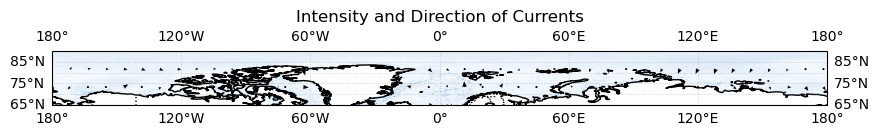

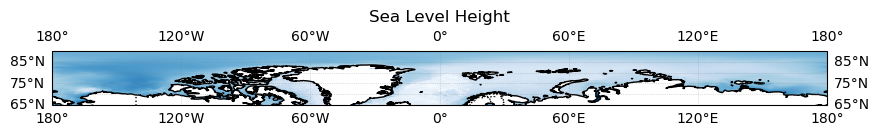

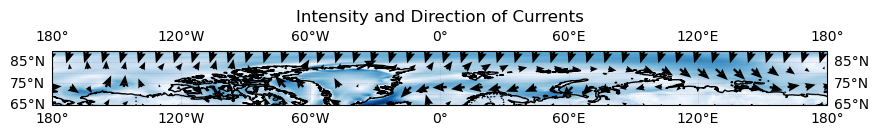

In [10]:
data = full.sel(time='2024-08-01', method='nearest')

plot_currents(data.uo.values, data.vo.values, data.latitude.values, data.longitude.values)
plot_height(data.zos.values, data.latitude.values, data.longitude.values)
plot_currents(data.u10.values, data.v10.values, data.latitude.values, data.longitude.values, arrow_scale=0.005)

full.to_netcdf(PATH_FULL)

In [22]:
data = xr.open_dataset(PATH_FULL, chunks="auto")

for var in data.data_vars:
    mask = data[var].notnull()
    masked_mean = data[var].where(mask).mean()
    data[var] = data[var].fillna(masked_mean)

min_val = data.min(dim=("time", "latitude", "longitude"))
max_val = data.max(dim=("time", "latitude", "longitude"))
data = (data - min_val) / (max_val - min_val)

data["day_of_year"] = data["time"].dt.dayofyear
data["sin_day"] = np.sin(2 * np.pi * data["day_of_year"] / 365.0)
data["cos_day"] = np.cos(2 * np.pi * data["day_of_year"] / 365.0)
data = data.drop_vars("day_of_year")

print(data)

<xarray.Dataset> Size: 10GB
Dimensions:    (latitude: 301, longitude: 4320, time: 366)
Coordinates:
  * latitude   (latitude) float32 1kB 65.0 65.08 65.17 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Data variables:
    uo         (time, latitude, longitude) float32 2GB dask.array<chunksize=(151, 124, 1790), meta=np.ndarray>
    vo         (time, latitude, longitude) float32 2GB dask.array<chunksize=(151, 124, 1790), meta=np.ndarray>
    zos        (time, latitude, longitude) float32 2GB dask.array<chunksize=(151, 124, 1790), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 2GB dask.array<chunksize=(151, 124, 1790), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 2GB dask.array<chunksize=(151, 124, 1790), meta=np.ndarray>
    sin_day    (time) float64 3kB 0.01721 0.03442 0.05162 ... 6.432e-16 0.01721
    cos_day    (ti

In [ ]:
print("Checking for remaining NaN values in each variable:")
for var in data.data_vars:
    nan_count = data[var].isnull().sum().compute()
    print(f"{var}: {nan_count.values} NaN(s) remaining")

print("Checking min-max scaling range:")
for var in data.data_vars:
    min_val = data[var].min().compute().values
    max_val = data[var].max().compute().values
    print(f"{var}: min={min_val:.6f}, max={max_val:.6f}")

data.to_netcdf(PATH_PROCESSED)

Checking for remaining NaN values in each variable:
uo: 0 NaN(s) remaining
vo: 0 NaN(s) remaining
zos: 0 NaN(s) remaining
u10: 0 NaN(s) remaining
v10: 0 NaN(s) remaining
sin_day: 0 NaN(s) remaining
cos_day: 0 NaN(s) remaining
Checking min-max scaling range:
uo: min=0.000000, max=1.000000
vo: min=0.000000, max=1.000000
zos: min=0.000000, max=1.000000
u10: min=0.000000, max=1.000000
v10: min=0.000000, max=1.000000
sin_day: min=-0.999991, max=0.999991
cos_day: min=-0.999963, max=1.000000
